# Aula Open Day - Aprendizado de M√°quina Cl√°ssico - Titanic

Nesta aula, vamos aprender a explorar e visualizar dados utilizando Python, tendo como base o cl√°ssico dataset do Titanic. Mais do que apenas gerar gr√°ficos, vamos exercitar nossa capacidade anal√≠tica para interpretar visualmente os dados e compreender os principais fatores que influenciaram a sobreviv√™ncia dos passageiros.

## **Evolu√ß√£o da An√°lise: Visualiza√ß√£o e Machine Learning**

Inicialmente, realizaremos uma an√°lise explorat√≥ria por meio de gr√°ficos e visualiza√ß√µes, utilizando bibliotecas como pandas, matplotlib e seaborn. Iremos usar essas ferramentas para entender como criar representa√ß√µes visuais eficazes, investigando aspectos como g√™nero, idade, classe social e tarifas pagas.

Em seguida, daremos um passo al√©m ao aplicar t√©cnicas b√°sicas de aprendizado de m√°quina supervisionado ‚Äî mais especificamente o algoritmo K-Nearest Neighbors (KNN). Utilizaremos o KNN para construir um modelo preditivo capaz de estimar a sobreviv√™ncia dos passageiros com base nas vari√°veis analisadas. Essa etapa permitir√° aos alunos compreender como transformar dados brutos em features relevantes e como avaliar o desempenho de um modelo simples de classifica√ß√£o.

## **Objetivo da Atividade:**

O objetivo desta atividade √© duplo: desenvolver habilidades s√≥lidas tanto em an√°lise visual quanto em fundamentos de machine learning. Ao final, os alunos ser√£o capazes de:

* Explorar dados e gerar visualiza√ß√µes informativas;

* Interpretar criticamente os gr√°ficos gerados, propondo ajustes quando necess√°rio;

* Preparar dados para uso em modelos de ML;

* Aplicar o algoritmo KNN para classificar e prever resultados com base em dados hist√≥ricos;

* Avaliar a acur√°cia e limita√ß√µes do modelo constru√≠do.

Essa abordagem integrada refor√ßa a import√¢ncia de unir an√°lise explorat√≥ria e t√©cnicas preditivas no processo de tomada de decis√£o baseada em dados.


In [1]:
# Importando as bibliotecas necess√°rias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Carregar o dataset Titanic diretamente do Seaborn
titanic_data = sns.load_dataset('titanic')

In [3]:
# Exibir as primeiras linhas do dataset para entender sua estrutura
titanic_data.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [4]:
# Exibir informa√ß√µes b√°sicas sobre o dataset
titanic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Distribui√ß√£o de Sobreviventes:

Primeiro, vamos visualizar a distribui√ß√£o dos sobreviventes para entender a propor√ß√£o entre aqueles que sobreviveram e aqueles que n√£o sobreviveram:

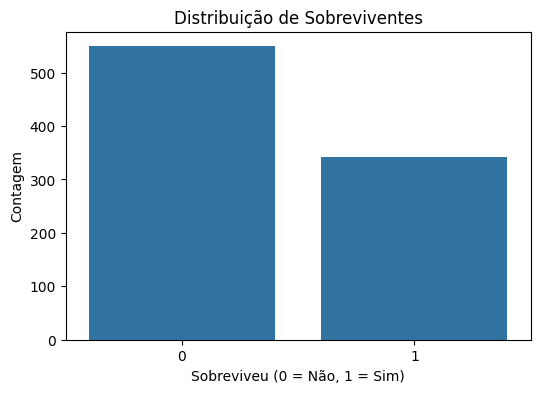

In [5]:
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', data=titanic_data)
plt.title('Distribui√ß√£o de Sobreviventes')
plt.xlabel('Sobreviveu (0 = N√£o, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()

**Interpreta√ß√£o**: Este gr√°fico de barras nos mostra a contagem absoluta de passageiros que sobreviveram versus aqueles que n√£o sobreviveram. Uma visualiza√ß√£o inicial como essa √© essencial para entender o desbalanceamento dos dados, o que pode ser crucial ao construir modelos preditivos.

## Distribui√ß√£o de Idade dos Passageiros:

Analisar a distribui√ß√£o da idade pode revelar insights sobre a demografia dos passageiros e como ela se relaciona com a sobreviv√™ncia:

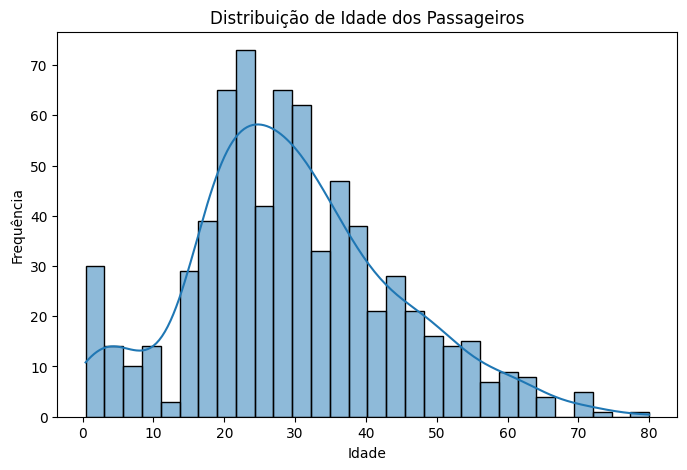

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(titanic_data['age'].dropna(), bins=30, kde=True)
plt.title('Distribui√ß√£o de Idade dos Passageiros')
plt.xlabel('Idade')
plt.ylabel('Frequ√™ncia')
plt.show()


**Interpreta√ß√£o**: O histograma com uma linha de densidade (KDE) ajuda a visualizar a distribui√ß√£o de idades, identificando a presen√ßa de picos, como crian√ßas pequenas e adultos em idade m√©dia. An√°lises adicionais poderiam investigar se certas faixas et√°rias tinham uma maior probabilidade de sobreviv√™ncia.

## Sobreviv√™ncia por G√™nero:

Vamos explorar como o g√™nero influenciou a taxa de sobreviv√™ncia:

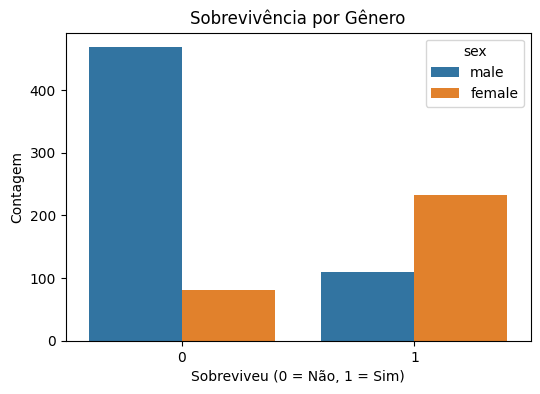

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='survived', hue='sex', data=titanic_data)
plt.title('Sobreviv√™ncia por G√™nero')
plt.xlabel('Sobreviveu (0 = N√£o, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()


**Interpreta√ß√£o**: Este gr√°fico de barras empilhadas destaca a diferen√ßa significativa nas taxas de sobreviv√™ncia entre homens e mulheres. No Titanic, havia uma regra de ‚Äúmulheres e crian√ßas primeiro‚Äù para os botes salva-vidas, o que explica a maior taxa de sobreviv√™ncia para mulheres. Esse insight √© importante ao considerar vari√°veis de g√™nero em an√°lises preditivas.

## Classe de Passageiros e Taxa de Sobreviv√™ncia:

Explorar a rela√ß√£o entre a classe social dos passageiros (1¬™, 2¬™, 3¬™ classe) e suas taxas de sobreviv√™ncia:

/tmp/ipython-input-8-3546462108.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pclass', y='survived', data=titanic_data, ci=None)


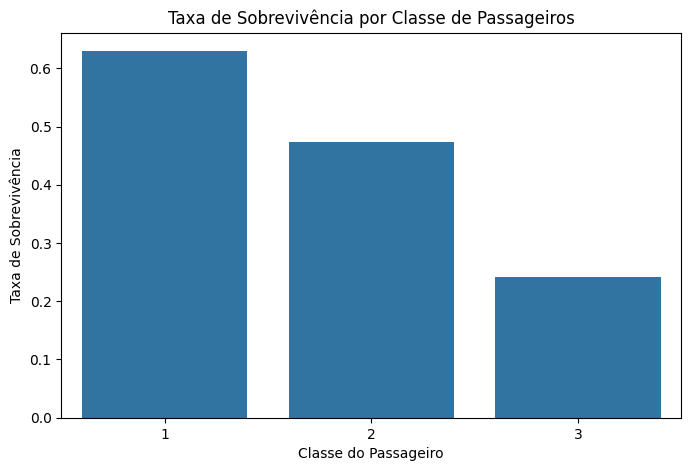

In [8]:
plt.figure(figsize=(8, 5))
sns.barplot(x='pclass', y='survived', data=titanic_data, ci=None)
plt.title('Taxa de Sobreviv√™ncia por Classe de Passageiros')
plt.xlabel('Classe do Passageiro')
plt.ylabel('Taxa de Sobreviv√™ncia')
plt.show()


**Interpreta√ß√£o**: Este gr√°fico de barras mostra que passageiros da 1¬™ classe tinham uma maior taxa de sobreviv√™ncia comparado com aqueles da 2¬™ e 3¬™ classe. Esse padr√£o provavelmente reflete o acesso mais r√°pido e f√°cil aos botes salva-vidas para passageiros em classes mais altas. Isso pode indicar que a classe social era um fator cr√≠tico na probabilidade de sobreviv√™ncia.

## Gr√°fico de Dispers√£o entre Idade e Tarifa:

A rela√ß√£o entre a idade dos passageiros e a tarifa paga, colorida pela sobreviv√™ncia, pode revelar tend√™ncias interessantes:

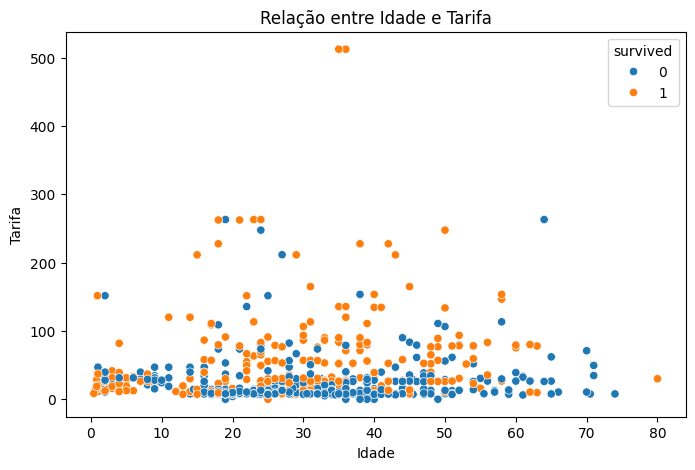

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='age', y='fare', hue='survived', data=titanic_data)
plt.title('Rela√ß√£o entre Idade e Tarifa')
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.show()


**Interpreta√ß√£o**: Este gr√°fico de dispers√£o permite observar se h√° uma correla√ß√£o entre a tarifa paga e a probabilidade de sobreviv√™ncia. Notamos que passageiros que pagaram tarifas mais altas (provavelmente da 1¬™ classe) tinham uma maior chance de sobreviv√™ncia, sugerindo uma correla√ß√£o entre status econ√¥mico e sobreviv√™ncia. Outliers como tarifas muito altas e baixas podem indicar a presen√ßa de passageiros em cabines de luxo ou tarifas subsidiadas.

---

# **Introdu√ß√£o ao KNN (K-Nearest Neighbors)**

O KNN (K-Nearest Neighbors) √© um dos algoritmos mais simples e intuitivos de aprendizado de m√°quina supervisionado. Ele √© usado tanto para classifica√ß√£o (descobrir a qual grupo algo pertence) quanto para regress√£o (prever um valor num√©rico). Vamos focar no uso do KNN para classifica√ß√£o.

## **Como o KNN funciona?**

Imagine que voc√™ acabou de conhecer uma pessoa nova e quer adivinhar se ela gosta de esportes. Voc√™ olha para outras pessoas parecidas com ela (em idade, g√™nero, h√°bitos, etc.) e observa se essas pessoas gostam ou n√£o de esportes.

### O KNN faz exatamente isso:

* Recebe um novo exemplo (por exemplo, um passageiro do Titanic).

* Procura os "K" vizinhos mais pr√≥ximos dele no conjunto de dados ‚Äî ou seja, os mais parecidos com base nas caracter√≠sticas (idade, classe, sexo, etc.).

* Vota entre os vizinhos: se a maioria sobreviveu, o novo exemplo provavelmente tamb√©m sobreviveria. Se a maioria n√£o sobreviveu, ele tamb√©m n√£o sobreviveria.

### Termos Importantes

* **K**: n√∫mero de vizinhos considerados. Exemplo: K = 3 ‚Üí o algoritmo olha os 3 mais pr√≥ximos.

* **Dist√¢ncia**: √© como o algoritmo mede quem est√° mais "pr√≥ximo". A dist√¢ncia mais usada √© a Euclidiana (como a r√©gua entre dois pontos).

* **Classifica√ß√£o**: prever a categoria de algo (ex: sobreviveu ou n√£o).

* **Regress√£o**: prever um valor num√©rico (ex: nota de um aluno).

### Exemplo simples

Imagine o gr√°fico abaixo, com pessoas que sobreviveram ou n√£o no Titanic:

üü¢ = Sobreviveu
üî¥ = N√£o Sobreviveu
‚ùì = Novo passageiro

```
        üü¢         üî¥
          
    üî¥     ‚ùì      üü¢
          
        üü¢         üî¥
```

Se K = 3, o algoritmo olha os 3 pontos mais pr√≥ximos. Suponha que sejam dois üü¢ e um üî¥ ‚Üí o novo passageiro ser√° classificado como sobreviveu.

**Vantagens do KNN**

* Simples e f√°cil de entender.

* N√£o exige treinamento complexo (os dados s√£o salvos e usados diretamente).

* Funciona bem quando as classes est√£o bem separadas.

**Desvantagens do KNN**

* Fica lento com muitos dados (porque precisa calcular a dist√¢ncia de todos os pontos).

* Sens√≠vel a dados irrelevantes ou com escalas diferentes.

* N√£o funciona bem em bases com muitos ru√≠dos ou muitas vari√°veis (alta dimensionalidade).

## **KNN no Titanic**

No caso do dataset Titanic, podemos usar o KNN para prever se um passageiro sobreviveu ou n√£o com base em:

* Idade

* Sexo

* Classe social

* Valor pago na passagem

* N√∫mero de familiares a bordo

Assim, ao receber os dados de um novo passageiro, o KNN buscar√° os passageiros mais parecidos no conjunto de dados e decidir√° sua poss√≠vel sobreviv√™ncia com base nisso.

## **Conclus√£o**

O KNN √© como um ‚Äúconselheiro por proximidade‚Äù: para tomar uma decis√£o, ele olha o que pessoas parecidas fizeram no passado. Por isso, ele √© √≥timo para come√ßar no mundo do aprendizado de m√°quina.

In [10]:
# Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Selecionar features e target
features = ['sex', 'age', 'pclass', 'fare']
df = titanic_data[features + ['survived']].dropna()

# Transformar dados categ√≥ricos em num√©ricos
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

# Separar vari√°veis independentes (X) e vari√°vel alvo (y)
X = df.drop('survived', axis=1)
y = df['survived']

# Dividir em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Padronizar os dados (muito importante para o KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Criar e treinar o modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Fazer previs√µes
y_pred = knn.predict(X_test_scaled)

# Avaliar desempenho
print("Matriz de Confus√£o:\n", confusion_matrix(y_test, y_pred))
print("\nRelat√≥rio de Classifica√ß√£o:\n", classification_report(y_test, y_pred))

Matriz de Confus√£o:
 [[105  21]
 [ 28  61]]

Relat√≥rio de Classifica√ß√£o:
               precision    recall  f1-score   support

           0       0.79      0.83      0.81       126
           1       0.74      0.69      0.71        89

    accuracy                           0.77       215
   macro avg       0.77      0.76      0.76       215
weighted avg       0.77      0.77      0.77       215



 --------- Nova Amostra:
   sex  age  pclass   fare
0    1   29       1  100.0

Resultado da previs√£o: ‚úÖ Sobreviveu
Probabilidade (sobreviveu): 1.00
Probabilidade (n√£o sobreviveu): 0.00


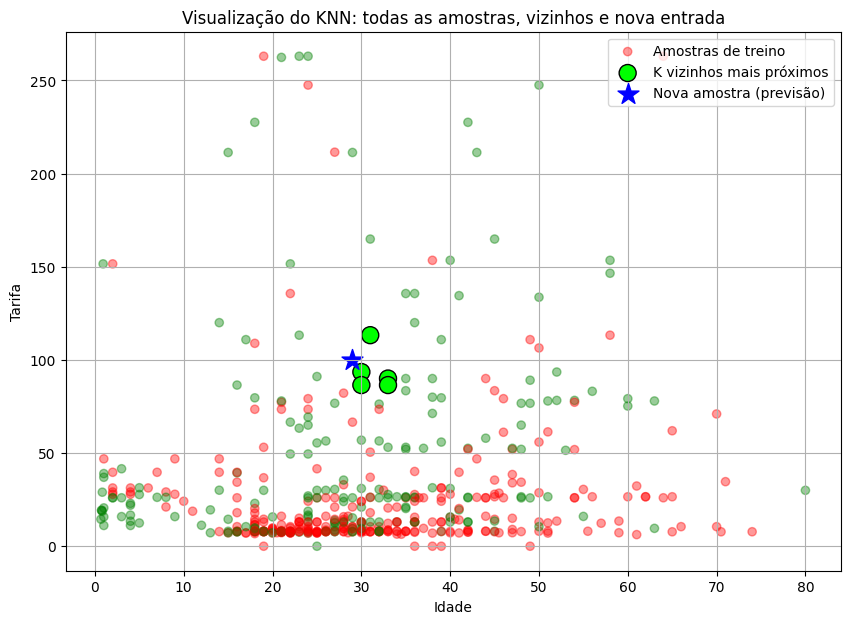

In [22]:
# Nova amostra fict√≠cia
nova_amostra = pd.DataFrame({
    'sex': [1],       # 1 = female
    'age': [29],
    'pclass': [1],
    'fare': [100.0]
})

# Padronizar a nova amostra
nova_amostra_scaled = scaler.transform(nova_amostra)

# Previs√£o com KNN
predicao = knn.predict(nova_amostra_scaled)
proba = knn.predict_proba(nova_amostra_scaled)

# üßæ Mostrar resultado
print(" --------- Nova Amostra:")
print(nova_amostra)
print()
print(f"Resultado da previs√£o: {'‚úÖ Sobreviveu' if predicao[0] == 1 else '‚ùå N√£o sobreviveu'}")
print(f"Probabilidade (sobreviveu): {proba[0][1]:.2f}")
print(f"Probabilidade (n√£o sobreviveu): {proba[0][0]:.2f}")


# Obter vizinhos mais pr√≥ximos
distancias, indices_vizinhos = knn.kneighbors(nova_amostra_scaled)
vizinhos_df = X_train.iloc[indices_vizinhos[0]].copy()
vizinhos_df['sobreviveu'] = y_train.iloc[indices_vizinhos[0]].values

# Criar base completa com r√≥tulo para cor
amostras_completas = X_train.copy()
amostras_completas['sobreviveu'] = y_train

# Paleta de cores
cores_amostras = ['green' if s == 1 else 'red' for s in amostras_completas['sobreviveu']]
cores_vizinhos = ['lime' if s == 1 else 'darkred' for s in vizinhos_df['sobreviveu']]

# Plotagem
plt.figure(figsize=(10, 7))

# 1. Plotar todas as amostras de treino
plt.scatter(amostras_completas['age'], amostras_completas['fare'],
            c=cores_amostras, alpha=0.4, label='Amostras de treino')

# 2. Destacar os vizinhos mais pr√≥ximos
plt.scatter(vizinhos_df['age'], vizinhos_df['fare'],
            c=cores_vizinhos, edgecolor='black', s=150, label='K vizinhos mais pr√≥ximos')

# 3. Plotar a nova amostra
plt.scatter(nova_amostra['age'], nova_amostra['fare'],
            c='blue', s=250, marker='*', label='Nova amostra (previs√£o)')

# Finaliza√ß√£o do gr√°fico
plt.xlabel('Idade')
plt.ylabel('Tarifa')
plt.title('Visualiza√ß√£o do KNN: todas as amostras, vizinhos e nova entrada')
plt.grid(True)
plt.legend()
plt.show()


<img src="https://i.chzbgr.com/full/9874864896/h8412A91E/lets-be-honest-there-room-2" height="600" />

In [ ]:
!pip install openai json5 --quiet

In [ ]:
import os
from openai import AzureOpenAI
import json, json5
import base64
from PIL import Image, ImageDraw, ImageFont
from google.colab import files

In [ ]:
def loads_jsonclean(input: str):
    """ Fun√ß√£o para ler Jsons do LLM
    """
    first_bracket = input.find('{')
    last_bracket = input.rfind('}')
    if first_bracket == -1 or last_bracket == -1:
        return None
    json_str = input[first_bracket:last_bracket + 1]
    try:
        return json5.loads(json_str)
    except Exception as e:
        raise e

In [ ]:
def resized_img(file_name: str) -> str:
    """ Fun√ß√£o para redimensionar imagens grandes
    """
    img = Image.open(file_name)
    width, height = img.size
    if width <= 600 or height <= 400:
        return file_name

    resized_img = img.resize((600, 400))
    file_name_output = "resized_" + file_name
    resized_img.save(file_name_output)
    print(f"Image resized to 600x400 and saved as '{file_name_output}'")
    return file_name_output

# Upload de Imagem

In [ ]:
# C√©lula para fazer Upload de um arquivo de imagem
uploaded = files.upload()

for fn in uploaded.keys():
  print(f'Arquivo recebido "{fn}" com {len(uploaded[fn])} bytes')
  fn_resized = resized_img(fn)
  print(f'Arquivo redimensionado "{fn_resized}"')

with Image.open(fn_resized) as img:
  display(img)

# Extra√ß√£o de caracter√≠sticas com LLM

In [ ]:

subscription_key = "" # @param {"type":"string"}
azure_endpoint="https://pf109-mdnt0apr-eastus2.cognitiveservices.azure.com/" # @param {"type":"string"}
api_version="2024-12-01-preview" # @param {"type":"string"}
deployment = "gpt-4.1"# @param {"type":"string"}
#deployment = "gpt-4o"# @param {"type":"string"}

client = AzureOpenAI(
    api_version=api_version,
    azure_endpoint=azure_endpoint,
    api_key=subscription_key,
)

In [ ]:
# Chamada do LLM, e armazenamento do retorno em `completion`
completion = client.chat.completions.create(
    model=deployment,
    messages=chat_prompt,
    max_tokens=800,
    temperature=0.7,
    top_p=0.95,
    frequency_penalty=0,
    presence_penalty=0,
    stop=None,
    stream=False
)

In [ ]:
#print(f"Retorno completo do LLM: \n{completion.to_json()}")

print(f"Custo em Tokens: {json.loads(completion.to_json())['usage']}\n")

# Vari√°vel com a parte mais importante do retorno
completion_content = json.loads(completion.to_json())["choices"][0]['message']['content']
pessoas_js = loads_jsonclean(completion_content)

# Display do Json de Pessoa
display( pessoas_js )